#  DSC540-T302 Data Preparation  #

## Weeks 5 & 6: Data Formats/Data Structures/Data Sources ##

### Saravanan Janarthanan ###

### Assignment ###

-------------


### Activity 5.01: Reading Tabular Data from a Web Page and Creating DataFrames ###

In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have to create three DataFrames from the three sources mentioned on the page (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)).

You will have to do the following:

    Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure.
    Read the page using bs4.
    Find the table structure you will need to deal with (how many tables are there?).
    Find the right table using bs4.
    Separate the source names and their corresponding data.
    Get the source names from the list of sources you have created.
    Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that.
    Repeat the last task for the other two data sources.



In [1]:
# Load the modules
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

#### Read the page using bs4.

**Since the page / link has a updated content with only one table,  wheras the orginal html had 3 tables,  the backup copy avalable locally is used**

In [2]:
# Read the page using bs4.

soup = " "
# Open the html file available in local file system  and load into a soup object
with open("datasets/List_of_countries_by_GDP.htm", "r", encoding='utf-8', errors='ignore') as fd:
    soup = BeautifulSoup(fd)


In [3]:
# Find the table structure you will need to deal with (how many tables are there?).
# Find all tables
tables = soup.find_all('table')

print(" Number of tables in the page is  : " , len(tables) )

 Number of tables in the page is  :  9


#### Find the right table using bs4. ####
Inspecting the table structure the GDP values are listed in 3 tables wrapped by a parent table.

The parent table styled using css class **"wikitable"|}**

The 3 tables that hold the GDP values are styles using **'wikitable sortable jquery-tablesorter'**  class

In [4]:
#  Retrieve the header by parsing the first 3 rows that has the header for 3 tables using TR and TD tags
gdp_tables = soup.find("table", {"class": '"wikitable"|}'})
tr_elements = gdp_tables.find_all('tr')
td_elements = tr_elements[0].find_all('td')
tables_hdr = [cell.text.strip() for cell in td_elements]
print(tables_hdr)




['Per the International Monetary Fund (2017)[1]', 'Per the World Bank (2017)[20]', 'Per the United Nations (2016)[21][22]']


In [5]:
# Retrieve all the tags in the table that was styled using class value 'wikitable sortable jquery-tablesorter''
# This returns all the 3 tables that has the gdp values
tables =  soup.find_all('table', class_='wikitable sortable jquery-tablesorter')

# Declare a list to hold the 3 tables data in a dataframe for later printing
table_content_df_lst = []

# Extract and print table data
# Iterate through the tables soup object ( 3 tables are available)
for index, table in enumerate(tables, start=1):
    # Reteieve all the TR tags 
    rows = table.find_all('tr')
    
    # Declare a list to hold all the row data of the table
    temp_lst = []
    
    for row in rows:
        # filter all the TH, TD, THEAD and TBODY tags 
        cells = row.find_all(['th','td','thead','tbody'])
        
        # strip other values and retrieve only the tag text values
        row_data = [cell.text.strip() for cell in cells]
        
        # based on the web page inspection ,   two tables has a character and numbers preceding the GSP value
        # indentify the index of the character and assign the values following the character
        spl_car_indx = str(row_data[2]).find("♠")
        if( spl_car_indx != -1):
            row_data[2] = str(row_data[2])[spl_car_indx+1:].strip()
        temp_lst.append(row_data)
    
    # Once all the rows in the tables are process,  create a data frame using the list of rows
    # the first record is the header and rest are all values
    # Add the Dataframe to the list
    table_content_df_lst.append(pd.DataFrame(temp_lst[1:], columns=temp_lst[0]))     

    
# Iterate the list and retrieve the dataframe that holds the table data    
for idx , df in enumerate(table_content_df_lst):
    
    # strip and super script reference values in the header
    sub_scrt_idx = tables_hdr[idx].find('[')
    print("Table : ", tables_hdr[idx][:sub_scrt_idx])
    
    # print the dataframe top 5 records
    print(df.head())
    print("\n\n")

Table :  Per the International Monetary Fund (2017)
  Rank        Country  GDP(US$MM)
0           World[19]  79,865,481
1    1  United States  19,390,600
2    2     China[n 1]  12,014,610
3    3          Japan   4,872,135
4    4        Germany   3,684,816



Table :  Per the World Bank (2017)
  Rank             Country  GDP(US$MM)
0                    World  80,683,787
1    1       United States  19,390,604
2       European Union[23]  17,277,698
3    2          China[n 4]  12,237,700
4    3               Japan   4,872,137



Table :  Per the United Nations (2016)
  Rank        Country  GDP(US$MM)
0           World[24]  75,648,448
1    1  United States  18,624,475
2    2     China[n 4]  11,218,281
3    3          Japan   4,936,211
4    4        Germany   3,477,796





Screen shot of the tables in web page

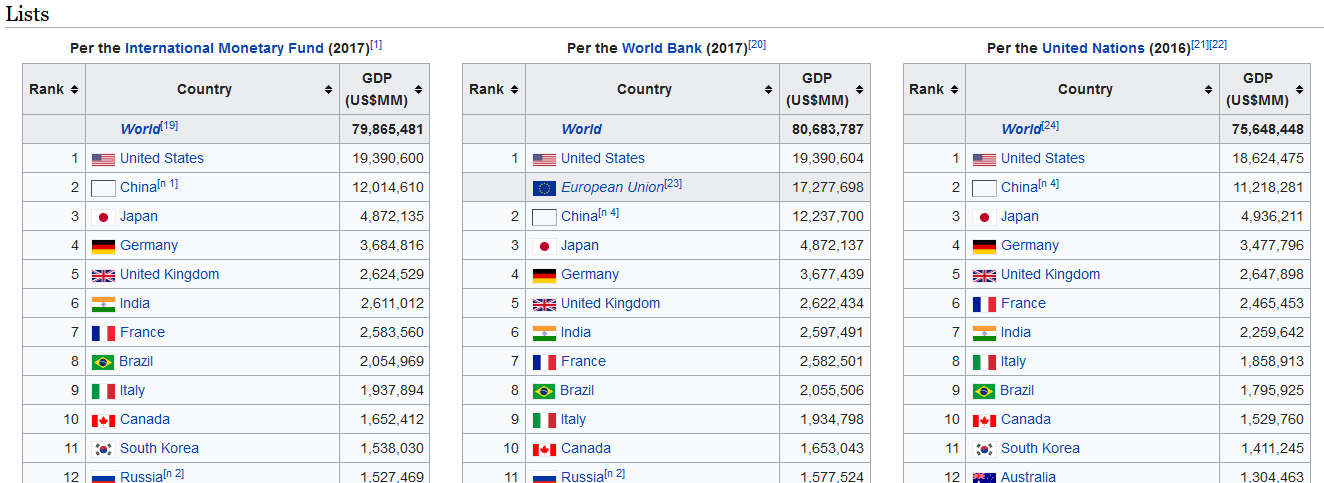

------------

**Activity 6.01: Handling Outliers and Missing Data**

In this activity, we will identify and get rid of outliers. Here, we have a CSV file. The goal here is to clean the data by using the knowledge that we have learned about so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data.

The dataset that we have used here can be found in the visit_data.csv file. This file contains data generated by a random data generator, and it contains people's names, their gender, email_id, ip_address, and the number of visits they made to a particular web page.


The steps that will help you solve this activity are as follows:

    Read the visit_data.csv file.
    Check for duplicates.
    Check whether any essential column contains NaN.
    Get rid of the outliers.
    Report the size difference.
    Create a box plot to check for outliers.
    Get rid of any outliers

**Read the visit_data.csv file.**

In [6]:
# Read the visit_data.csv file.
vis_dat_df = pd.read_csv('visit_data.csv')
vis_dat_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [7]:
print('The file has ', len(vis_dat_df), ' records')

The file has  1000  records


**Check for duplicates.**

In [8]:
duplicate_data = vis_dat_df.duplicated()

In [9]:
print('there are ', duplicate_data.sum(), ' duplicate records in the data file ')

there are  0  duplicate records in the data file 


In [10]:
# Iterate the columns and print the duplicate values
for col_nm in vis_dat_df.columns:
    print('Total number rows that are duplicated for column ', col_nm ,  ' is ', vis_dat_df[col_nm].duplicated().sum())

Total number rows that are duplicated for column  id  is  0
Total number rows that are duplicated for column  first_name  is  320
Total number rows that are duplicated for column  last_name  is  299
Total number rows that are duplicated for column  email  is  0
Total number rows that are duplicated for column  gender  is  997
Total number rows that are duplicated for column  ip_address  is  0
Total number rows that are duplicated for column  visit  is  164


**Check whether any essential column contains NaN**

In [11]:
# print the nan counts in each column
vis_dat_df.isna().sum()

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64

Purpose of the data is to collect the number of visits ,  if it is null or no data,  then it does not serve the purpose,  hence removing those outliers


In [12]:
# drop the records that has NAN values in visits column or feature
vis_data_df_cleaned = vis_dat_df.dropna(subset=['visit'])

**Report the size difference.**

In [13]:
# Print the net record count after dropping records
print('The key column cleaned up  file has ', len(vis_data_df_cleaned), ' records')
print('number of records deleted are ', (1000- len(vis_data_df_cleaned)))

The key column cleaned up  file has  974  records
number of records deleted are  26


**Create a box plot to check for outliers.**

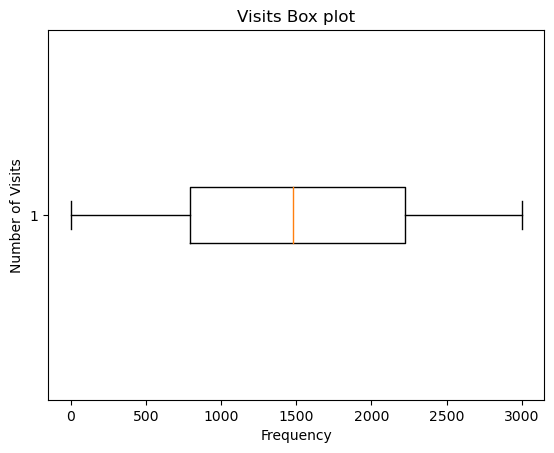

In [14]:
# Create a box plot to visually view the quantiles , Inter Quantile Range,  Lower Quantile  (left most) 
# and Upper Quantile (right most)
import matplotlib.pyplot as plt
plt.boxplot(vis_data_df_cleaned['visit'], vert=False, meanline=True)
plt.ylabel('Number of Visits')
plt.xlabel('Frequency')
plt.title('Visits Box plot')
plt.show()

In [15]:
# From the box plot the outliers are on 1st and 4th quantile
# print the quantile values
print('Quantile values')
print(vis_data_df_cleaned['visit'].quantile([ 0,0.25, 0.5, 0.75, 1]))

Quantile values
0.00       1.00
0.25     794.50
0.50    1477.00
0.75    2224.25
1.00    2998.00
Name: visit, dtype: float64


In [16]:
min(vis_data_df_cleaned['visit'])

1.0

In [17]:
max(vis_data_df_cleaned['visit'])

2998.0

**Get rid of any outliers**

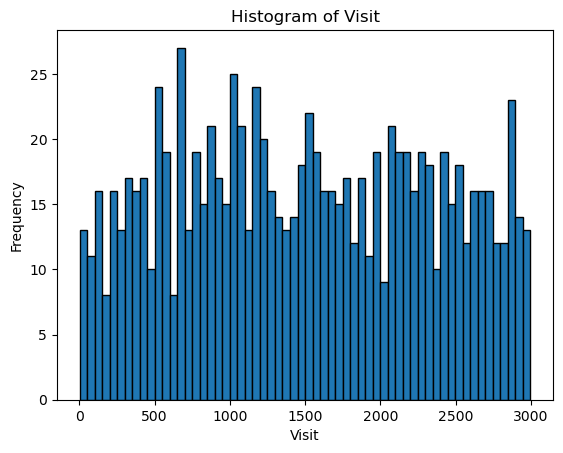

In [18]:
# Create a histogram
plt.hist(vis_data_df_cleaned['visit'], bins=60, edgecolor='black')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Visit')
plt.ylabel('Frequency')
plt.title('Histogram of Visit')

# Show the plot
plt.show()

In [19]:
# From the histogram view 
# removing values less than 50 and greater than 2850
vis_data_df_final = vis_data_df_cleaned[(vis_data_df_cleaned['visit'] > 50) & (vis_data_df_cleaned['visit'] < 2850) ]

In [20]:
vis_data_df_final.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [21]:
print('Final size of the dataframe after cleaning up the outliers is ', len(vis_data_df_final) )

Final size of the dataframe after cleaning up the outliers is  913


-------

#### 3. Insert data into a SQL Lite database #### 

– create a table with the following data below that you will create yourself (Hint on how to create the SQL: Python for Data Analysis 2nd edition page 191, Python for Data Analysis 3rd Edition: Page 199):
- a. Name, Address, City, State, Zip, Phone Number
- b. Add at least 10 rows of data and submit your code with a query generating your results.

In [22]:
import sqlite3

In [23]:
# create a table with Name, Address, City, State, Zip, Phone-Number columns
db_qry = """ CREATE TABLE user_profile (name VARCHAR(50), address VARCHAR(50), city VARCHAR(20), state VARCHAR(20), zip INTEGER, phone_number INTEGER );"""
# Obtain a SQL connection 
db_con = sqlite3.connect("mydata.sqlite")
# exeute the query to create the table
db_con.execute(db_qry)
# commit the executed query 
db_con.commit()

In [24]:
# create 10 rows of data for the table
prof_data = [('Emily Johnson','123 Oak Street',' Springfield','IL','62701',2015550123),
             ('Michael Smith','456 Elm Avenue',' Portland','OR','97201',3105552345),
             ('Olivia Williams','789 Maple Lane',' Houston','TX','77002',4045554567),
             ('Ethan Brown','101 Pine Street',' New York','NY','10001',5125556789),
             ('Ava Jones','234 Cedar Road',' Los Angeles','CA','90001',6175558901),
             ('Noah Taylor','567 Birch Boulevard',' Chicago','IL','60601',7025551234),
             ('Sophia Martinez','890 Walnut Drive',' Atlanta','GA','30301',8135553456),
             ('Liam Anderson','1123 Willow Way',' Miami','FL','33101',9145555678),
             ('Isabella Wilson','4567 Oakwood Court',' Seattle','WA','98101',9715557890),
             ('Mason Davis','8901 Cedarwood Avenue',' Dallas','TX','75201',9895559012)]

In [25]:
# Declare a insert statement query
tbl_insrt_stmt = "INSERT INTO user_profile VALUES(?, ?, ?, ?, ?, ?)"

In [26]:
# execute and commit the query to insert the data
db_con.executemany(tbl_insrt_stmt, prof_data)
db_con.commit()

In [27]:
# Create a cursor to run SELECT query
cursor = db_con.execute("SELECT * FROM user_profile")
# Get all the rows from the query
rows = cursor.fetchall()
rows

[('Emily Johnson', '123 Oak Street', ' Springfield', 'IL', 62701, 2015550123),
 ('Michael Smith', '456 Elm Avenue', ' Portland', 'OR', 97201, 3105552345),
 ('Olivia Williams', '789 Maple Lane', ' Houston', 'TX', 77002, 4045554567),
 ('Ethan Brown', '101 Pine Street', ' New York', 'NY', 10001, 5125556789),
 ('Ava Jones', '234 Cedar Road', ' Los Angeles', 'CA', 90001, 6175558901),
 ('Noah Taylor', '567 Birch Boulevard', ' Chicago', 'IL', 60601, 7025551234),
 ('Sophia Martinez', '890 Walnut Drive', ' Atlanta', 'GA', 30301, 8135553456),
 ('Liam Anderson', '1123 Willow Way', ' Miami', 'FL', 33101, 9145555678),
 ('Isabella Wilson',
  '4567 Oakwood Court',
  ' Seattle',
  'WA',
  98101,
  9715557890),
 ('Mason Davis', '8901 Cedarwood Avenue', ' Dallas', 'TX', 75201, 9895559012)]

In [28]:
# Using sqlalchemy to query the table
import sqlalchemy as sqla

In [29]:
db = sqla.create_engine("sqlite:///mydata.sqlite")

In [30]:
pd.read_sql("SELECT * FROM user_profile", db)

,name,address,city,state,zip,phone_number
0,Emily Johnson,123 Oak Street,Springfield,IL,62701,2015550123
1,Michael Smith,456 Elm Avenue,Portland,OR,97201,3105552345
2,Olivia Williams,789 Maple Lane,Houston,TX,77002,4045554567
3,Ethan Brown,101 Pine Street,New York,NY,10001,5125556789
4,Ava Jones,234 Cedar Road,Los Angeles,CA,90001,6175558901
5,Noah Taylor,567 Birch Boulevard,Chicago,IL,60601,7025551234
6,Sophia Martinez,890 Walnut Drive,Atlanta,GA,30301,8135553456
7,Liam Anderson,1123 Willow Way,Miami,FL,33101,9145555678
8,Isabella Wilson,4567 Oakwood Court,Seattle,WA,98101,9715557890
9,Mason Davis,8901 Cedarwood Avenue,Dallas,TX,75201,9895559012


In [31]:
# Delete the table 
cursor = db_con.cursor()
cursor.execute(f"DROP TABLE IF EXISTS user_profile;")
db_con.commit()


In [32]:
# close the connections 
cursor.close()
db_con.close()